In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import os
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from src.visualization.plots import *

sns.set(rc={'figure.figsize':(15,10)})
sns.set_theme(style="ticks", palette="pastel")

In [11]:
def annotate(data, regressor='kdn'):
    slope, intercept, r, p, std_err = st.linregress(data[regressor],data['score'])
    # r, p = sp.stats.pearsonr(data['score'], data[regressor])
    ax = plt.gca()
    plt.text(.05, .85, f'r={r:.2f}, p={p:.2g}',
            transform=ax.transAxes)
    plt.text(.05, .95, f'y={intercept:.2f} + {slope:.2f} ({std_err:.2f})x ',
            transform=ax.transAxes)
    plt.show()

In [12]:
exps = sorted([exp[:-5] for exp in os.listdir('../results/sampling')])

summary = pd.DataFrame(columns = ['score', 'kdn','dkdn','kdn_l', 'kdn_h', 'dkdn_l', 'dkdn_h'], index = exps)
for exp in exps:
    with open(f'../results/sampling/{exp}.json', 'r') as fin:
        exp_summary = json.load(fin)
    kdn = exp_summary[exp]['info']['complexity']['global'][0]
    dkdn = exp_summary[exp]['info']['complexity']['global'][1]
    kdn_l = min(exp_summary[exp]['info']['complexity']['class 0'][0], exp_summary[exp]['info']['complexity']['class 1'][0])
    kdn_h = max(exp_summary[exp]['info']['complexity']['class 0'][0], exp_summary[exp]['info']['complexity']['class 1'][0])
    dkdn_l = min(exp_summary[exp]['info']['complexity']['class 0'][1], exp_summary[exp]['info']['complexity']['class 1'][1])
    dkdn_h = max(exp_summary[exp]['info']['complexity']['class 0'][1], exp_summary[exp]['info']['complexity']['class 1'][1])
    score = max(exp_summary['SVC']['test_score'], exp_summary['KNeighborsClassifier']['test_score'], exp_summary['RandomForestClassifier']['test_score'])
    summary.loc[exp, :] = [score, 1-kdn, 1-dkdn, 1-kdn_l, 1-kdn_h, 1-dkdn_l, 1-dkdn_h]
summary = summary.astype(float)

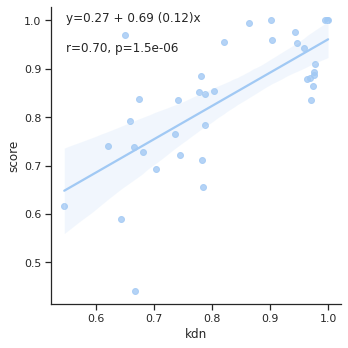

In [13]:
regressor = 'kdn'
g = sns.lmplot(x=regressor, y='score', data=summary)
annotate(summary, regressor)

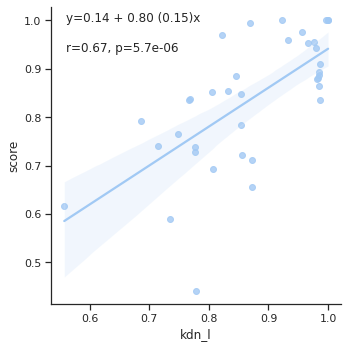

In [14]:
regressor = 'kdn_l'
g = sns.lmplot(x=regressor, y='score', data=summary)
annotate(summary, regressor)

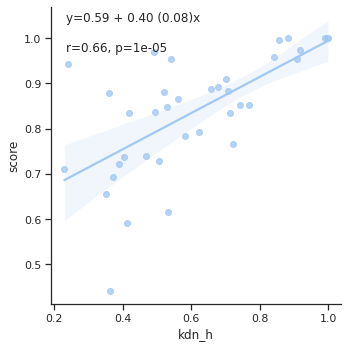

In [15]:
regressor = 'kdn_h'
g = sns.lmplot(x=regressor, y='score', data=summary)
annotate(summary, regressor)

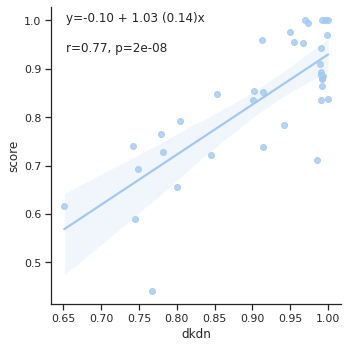

In [16]:
regressor = 'dkdn'
g = sns.lmplot(x=regressor, y='score', data=summary)
annotate(summary, regressor)

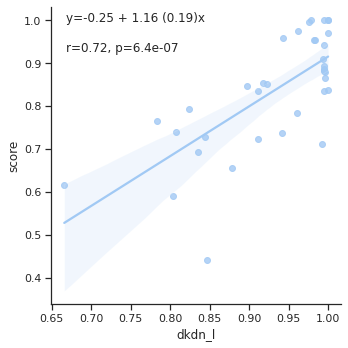

In [17]:
regressor = 'dkdn_l'
g = sns.lmplot(x=regressor, y='score', data=summary)
annotate(summary, regressor)

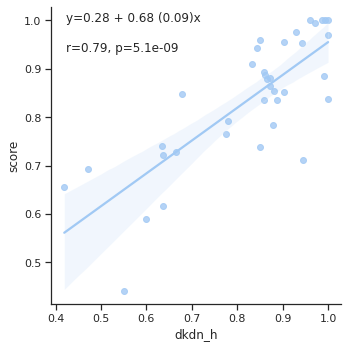

In [18]:
regressor = 'dkdn_h'
g = sns.lmplot(x=regressor, y='score', data=summary)
annotate(summary, regressor)